In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

/var/folders/v0/zqskjwfn20j0t8sj_n9_5s1c0000gn/T/ipykernel_32296/305869175.py:11: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([no_data, yes_data], labels=['No Fast Food', 'Yes Fast Food'])


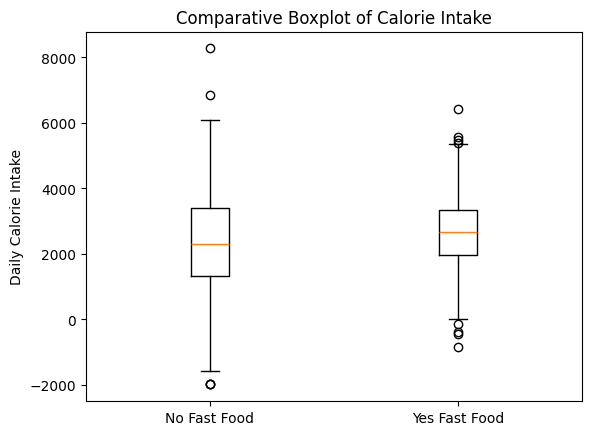

t-statistic: 2.2007
p-value: 0.0142


In [3]:
# Given summary data
no_n, no_mean, no_sd = 663, 2258, 1519
yes_n, yes_mean, yes_sd = 413, 2637, 1138

# (a) Comparative Boxplot
# Simulating data consistent with the summary statistics
np.random.seed(1)
no_data = np.random.normal(no_mean, no_sd, no_n)
yes_data = np.random.normal(yes_mean, yes_sd, yes_n)

plt.boxplot([no_data, yes_data], labels=['No Fast Food', 'Yes Fast Food'])
plt.ylabel('Daily Calorie Intake')
plt.title('Comparative Boxplot of Calorie Intake')
plt.show()

# (b) Hypothesis Test
# H0: mu_yes - mu_no <= 200
# Ha: mu_yes - mu_no > 200

# Standard error
se = np.sqrt((no_sd**2 / no_n) + (yes_sd**2 / yes_n))
t_stat = ((yes_mean - no_mean) - 200) / se
df = min(no_n - 1, yes_n - 1)  # conservative df
p_value = 1 - stats.t.cdf(t_stat, df)

print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.4f}")

As p is smaller than 0.05 we can reject the null hypotheses, we have signifant evidence that fast food eaters consume significantly more than 200 extra calories 

/var/folders/v0/zqskjwfn20j0t8sj_n9_5s1c0000gn/T/ipykernel_32296/3668744527.py:10: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([older_data, younger_data], labels=['Older Adults', 'Younger Adults'])


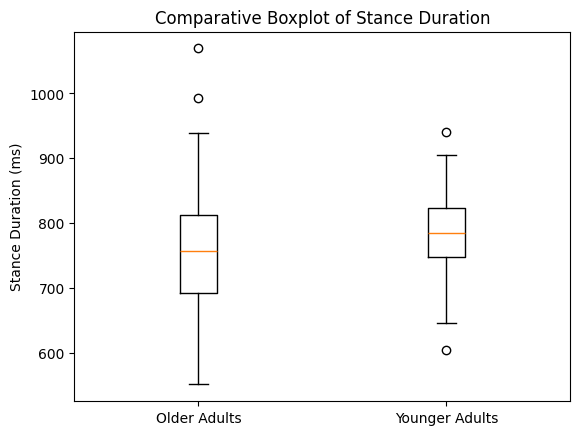

99% CI for older adults: (739.74, 862.26)
t-statistic: 0.7366
p-value: 0.2364


In [4]:
# Given summary data
older_n, older_mean, older_sd = 28, 801, 117
younger_n, younger_mean, younger_sd = 16, 780, 72

# (a) Comparative Boxplot
np.random.seed(2)
older_data = np.random.normal(older_mean, older_sd, older_n)
younger_data = np.random.normal(younger_mean, younger_sd, younger_n)

plt.boxplot([older_data, younger_data], labels=['Older Adults', 'Younger Adults'])
plt.ylabel('Stance Duration (ms)')
plt.title('Comparative Boxplot of Stance Duration')
plt.show()

# (b) 99% Confidence Interval for Older Adults
t_crit = stats.t.ppf(1 - 0.005, df=older_n - 1)
ci_lower = older_mean - t_crit * (older_sd / np.sqrt(older_n))
ci_upper = older_mean + t_crit * (older_sd / np.sqrt(older_n))

print(f"99% CI for older adults: ({ci_lower:.2f}, {ci_upper:.2f})")

# (c) Hypothesis Test: Is stance duration larger in older adults?
# H0: mu_older <= mu_younger
# Ha: mu_older > mu_younger

# Standard error
se2 = np.sqrt((older_sd**2 / older_n) + (younger_sd**2 / younger_n))
t_stat2 = (older_mean - younger_mean) / se2
df2 = min(older_n - 1, younger_n - 1)  # conservative df
p_value2 = 1 - stats.t.cdf(t_stat2, df2)

print(f"t-statistic: {t_stat2:.4f}")
print(f"p-value: {p_value2:.4f}")


Since p is greater that 0.05 we fail to reject the null hypothesis. There is not enough evidence to conlude that older adults have a significantly longer stance duration than younger adults